In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')

# READ FILES TO GET TRAINING DATASET

In [10]:
train_stance = pd.read_csv('train_stances.csv')
train_body = pd.read_csv('train_bodies.csv')

## File 'train_stances.csv' has 49972 data points, each is represented by 3 attributes: (Headline, bodyID, stances)

In [11]:
train_stance.shape

(49972, 3)

## File 'train_body.csv' has 1683 data points, each is represented by 2 attribute: (BodyID, articleBody)

In [12]:
train_body.shape

(1683, 2)

## Merge this 2 sheet to create a complete dataset

In [6]:
train = pd.merge(train_stance, train_body, how='left', on='Body ID')

In [6]:
#train[1:10]

In [7]:
target = ['agree', 'disagree', 'discuss', 'unrelated']
target_dict = dict(zip(target, range(len(target))))

In [8]:
train.shape

(49972, 4)

## Create numerical labels for training dataset
'agree' : 0;
 'disagree': 1;
 'discuss': 2;
 'unrelated': 3

In [13]:
f = lambda x: target_dict[x]

In [14]:
train['label'] = [f(train['Stance'][i]) for i in range(len(train['Stance']))]

In [15]:
train[1:10]

,Headline,Body ID,Stance,articleBody,label
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...,0
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...,3
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...,3
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's...",1
5,'Nasa Confirms Earth Will Experience 6 Days of...,154,agree,Thousands of people have been duped by a fake ...,0
6,Accused Boston Marathon Bomber Severely Injure...,962,unrelated,A British fighter who travelled to Iraq to sto...,3
7,Identity of ISIS terrorist known as 'Jihadi Jo...,2033,unrelated,"Adding to Apple's iOS 8 launch troubles, a rep...",3
8,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,agree,If you’ve seen a story floating around on your...,0
9,British Aid Worker Confirmed Murdered By ISIS,882,unrelated,The British Islamic State militant who has fea...,3


## Check missing values

In [16]:
train.isnull().sum().sum()

0

## Split the text only to become features of the model

In [22]:
X_text_train = pd.DataFrame(train[['Headline', 'articleBody']])

In [14]:
#X_text_train.isnull()

## take the label

In [59]:
y_train = train['label']

In [60]:
type(y_train)

pandas.core.series.Series

## Get the test data

In [17]:
test_stance = pd.read_csv('competition_test_stances.csv')
test_body = pd.read_csv('test_bodies.csv')
test  = pd.merge(test_stance, test_body, how='left', on='Body ID')
test['label'] = [f(test['Stance'][i]) for i in range(len(test['Stance']))]

X_text_test = pd.DataFrame(test[['Headline', 'articleBody']])
y_test = test['label']

# PREPROCESSING TEXT

In [18]:
import re

In [19]:
dele_words = '(,|\n|\.|\d|\'|-)'

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
corpus_train = [X_text_train['Headline'][i].lower() + ' ' + X_text_train['articleBody'][i].lower() for i in range(len(X_text_train['articleBody']))]
corpus_test = [X_text_test['Headline'][i].lower() + ' ' + X_text_test['articleBody'][i].lower() for i in range(len(X_text_test['articleBody']))]

In [24]:
fix_train = []
for i in corpus_train:
    m = re.sub(dele_words, ' ', i)
    fix_train.append(m)

In [25]:
for i in fix_train:
    i = re.sub('\s+', ' ', i)

In [32]:
fix_train_words = [i.split(" ") for i in fix_train]

In [38]:
type(fix_train_words[0])

list

In [39]:
for i in fix_train_words:
    for j in i:
        if j == '' or j in stop_words:
            i.remove(j)

In [46]:
fix_train_words[0]

['police',
 'find',
 'mass',
 'graves',
 'least',
 'bodies',
 'near',
 'mexico',
 'town',
 'students',
 'disappeared',
 'police',
 'clash',
 'danny',
 'boyle',
 'directing',
 'untitled',
 'film',
 'seth',
 'rogen',
 'being',
 'eyed',
 'play',
 'apple',
 'co',
 'founder',
 'steve',
 'wozniak',
 'sony’s',
 'steve',
 'jobs',
 'biopic',
 'danny',
 'boyle',
 'directing',
 'untitled',
 'film',
 'based',
 'walter',
 'isaacson',
 'book',
 'adapted',
 'aaron',
 'sorkin',
 'which',
 'one',
 'anticipated',
 'biopics',
 'recent',
 'years',
 'negotiations',
 'yet',
 'begun',
 'it’s',
 'not',
 'even',
 'clear',
 'rogen',
 'an',
 'official',
 'offer',
 'but',
 'producers',
 '—',
 'scott',
 'rudin',
 'guymon',
 'casady',
 'mark',
 'gordon',
 '—',
 'set',
 'sights',
 'the',
 'talent',
 'are',
 'talks',
 'course',
 'this',
 'may',
 'be',
 'naught',
 'christian',
 'bale',
 'the',
 'actor',
 'play',
 'jobs',
 'still',
 'the',
 'midst',
 'closing',
 'deal',
 'sources',
 'say',
 'dealmaking',
 'process',
 '

In [41]:
fix_test = []
for i in corpus_test:
    m = re.sub(dele_words, ' ', i)
    fix_test.append(m)
                    
for i in fix_test:
    i = re.sub('\s+', '', i)
                    
fix_test_words = [i.split(" ") for i in fix_test]
for i in fix_test_words:
    for j in i:
        if j == '' or j in stop_words:
            i.remove(j)

In [42]:
type(fix_train)

list

# UNBALANCED DATASET

## TRAINING SET

(array([ 3678.,   840.,  8909., 36545.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

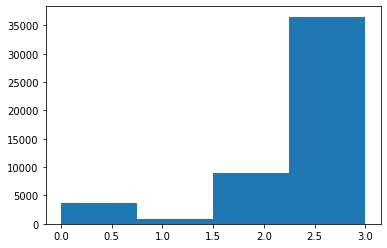

In [83]:
plt.hist(y_train, bins=4)

## TEST SET

(array([ 1903.,   697.,  4464., 18349.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

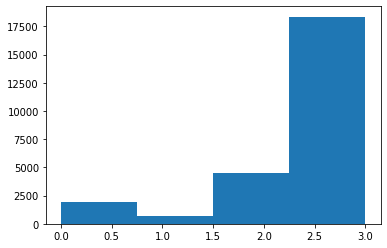

In [84]:
plt.hist(y_test, bins=4)

# TFIDF FEATURE EXTRACTION

In [49]:
fix_words = fix_train_words + fix_test_words

In [50]:
fix = [" ".join(i) for i in fix_words]

In [52]:
fix[0]

'police find mass graves least bodies near mexico town students disappeared police clash danny boyle directing untitled film seth rogen being eyed play apple co founder steve wozniak sony’s steve jobs biopic danny boyle directing untitled film based walter isaacson book adapted aaron sorkin which one anticipated biopics recent years negotiations yet begun it’s not even clear rogen an official offer but producers — scott rudin guymon casady mark gordon — set sights the talent are talks course this may be naught christian bale the actor play jobs still the midst closing deal sources say dealmaking process is in sensitive stage   insiders say boyle is flying los angeles meet actress play one the female leads  an assistant jobs  insiders say jessica chastain is one the actresses the meeting list   wozniak  known "woz " co founded apple jobs ronald wayne  he first met jobs they worked atari and later responsible creating the early apple computers '

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_all_tfidf = vectorizer.fit_transform(fix)

In [54]:
X_train_tfidf = X_all_tfidf[0:len(fix_train), :]
X_test_tfidf = X_all_tfidf[len(fix_train): len(fix), :]

In [55]:
X_test

NameError: name 'X_test' is not defined

# IMPORT CLASSIFICATION METRICS AND LIBRARY

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# DECISION TREE CLASSIFIER

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [63]:
tree.score(X_train_tfidf, y_train)

1.0

In [62]:
tree.score(X_test_tfidf, y_test)

0.5859205918230826

In [64]:
y_DT = tree.predict(X_test_tfidf)

In [66]:
confusion_matrix(y_test, y_DT)

array([[  252,    36,   398,  1217],
       [   49,    15,   216,   417],
       [  345,    69,  1352,  2698],
       [ 1757,   185,  4115, 12292]], dtype=int64)

In [67]:
print(classification_report(y_test, y_DT))

              precision    recall  f1-score   support

           0       0.10      0.13      0.12      1903
           1       0.05      0.02      0.03       697
           2       0.22      0.30      0.26      4464
           3       0.74      0.67      0.70     18349

    accuracy                           0.55     25413
   macro avg       0.28      0.28      0.28     25413
weighted avg       0.58      0.55      0.56     25413



# RANDOM FOREST CLASSIFIER

In [69]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
forest.score(X_train_tfidf, label1)

1.0

In [70]:
y_RF = forest.predict(X_test_tfidf)

In [72]:
confusion_matrix(y_test, y_RF)

array([[    4,     0,    92,  1807],
       [    0,     0,     9,   688],
       [    4,     0,   640,  3820],
       [   34,     0,  1902, 16413]], dtype=int64)

In [75]:
print(classification_report(y_test, y_RF))

              precision    recall  f1-score   support

           0       0.10      0.00      0.00      1903
           1       0.00      0.00      0.00       697
           2       0.24      0.14      0.18      4464
           3       0.72      0.89      0.80     18349

    accuracy                           0.67     25413
   macro avg       0.26      0.26      0.25     25413
weighted avg       0.57      0.67      0.61     25413



C:\Users\Tuan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# GRADIENT BOOSTING CLASSIFIER

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
gbrt.score(X_train_tfidf, y_train)

0.8134755463059313

In [79]:
y_gbrt = gbrt.predict(X_test_tfidf)

In [80]:
print(classification_report(y_test, y_gbrt))

              precision    recall  f1-score   support

           0       0.03      0.00      0.00      1903
           1       0.07      0.12      0.09       697
           2       0.28      0.03      0.05      4464
           3       0.72      0.93      0.81     18349

    accuracy                           0.68     25413
   macro avg       0.28      0.27      0.24     25413
weighted avg       0.57      0.68      0.60     25413



# LINEAR SVM

In [57]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X_train, y_train)

In [58]:
linear_svm.score(X_train, y_train)

0.8531177459377252

In [59]:
linear_svm.score(X_test, y_test)

0.27639397158934403

In [ ]:
linear_svm.predict(X_test)

In [60]:
print(classification_report(y_test, linear_svm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.13      0.18      0.15      1903
          1       0.00      0.00      0.00       697
          2       0.20      0.84      0.32      4464
          3       0.78      0.16      0.27     18349

avg / total       0.61      0.28      0.26     25413



C:\Users\Tuan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [27]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)

In [28]:
svm.score(X_train, y_train)

0.7313095333386697

In [29]:
svm.score(X_test, y_test)

0.7220320308503522

In [32]:
y_svm = svm.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_svm))

[[    0     0     0  1903]
 [    0     0     0   697]
 [    0     0     0  4464]
 [    0     0     0 18349]]


In [34]:
print(classification_report(y_test, svm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1903
          1       0.00      0.00      0.00       697
          2       0.00      0.00      0.00      4464
          3       0.72      1.00      0.84     18349

avg / total       0.52      0.72      0.61     25413



C:\Users\Tuan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
